#### improve decision tree from class

In [20]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
import pydotplus

from IPython.display import Image

diabetes_df = pd.read_csv("../diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [22]:
# decision tree classifier
model = tree.DecisionTreeClassifier(max_depth = 10,random_state=42)

In [23]:
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
print('In class output')
print(classification_report(y_test, y_pred))

In class output
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



#### Improved accuracy, precision and recall with feature selection, random oversampling, and manipulation of the depth



[ 0.00000000e+00  6.10583779e-03 -0.00000000e+00  0.00000000e+00
 -6.03652763e-05  5.84323781e-03  0.00000000e+00  2.22961797e-03]


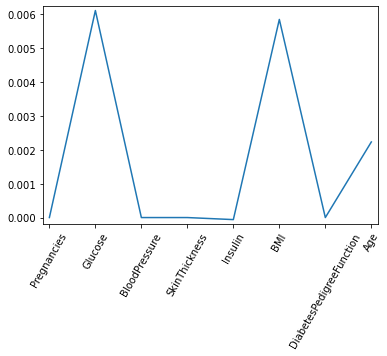

In [36]:
import numpy as np
import matplotlib.pyplot as plt
# Import Lasso
from sklearn.linear_model import Lasso

# need arrays and need to reshape them
X = diabetes_df.drop('Outcome', axis=1)
y = np.array(diabetes_df['Outcome']).reshape(-1,1)

diabetes_df_columns= diabetes_df.drop('Outcome', axis=1).columns
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
# coefficients are used for creating the regression equation y = mx + mx1 + mx2...+ mxn + b
plt.plot(range(len(diabetes_df_columns)), lasso_coef)
plt.xticks(range(len(diabetes_df_columns)), diabetes_df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()
# so you can see X4, X5 and X7 are the least useful for predicting X3 because they are 0

In [70]:
X = diabetes_df[['Glucose','BMI','Age']]
y = diabetes_df['Outcome']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# decision tree classifier
model = tree.DecisionTreeClassifier(max_depth = 5, random_state=42)

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled= ros.fit_resample(X_train, y_train)

model = model.fit(X_resampled, y_resampled)
#model = model.fit(X_test, y_test)
y_pred = model.predict(X_test)

print('Test output')
#print(classification_report(y_test, y_pred))
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

Test output
                   pre       rec       spe        f1       geo       iba       sup

          0       0.90      0.70      0.85      0.79      0.77      0.59       100
          1       0.61      0.85      0.70      0.71      0.77      0.61        54

avg / total       0.79      0.75      0.80      0.76      0.77      0.59       154



#### Create a function that accepts name array and returns a string formatted as a list of names separated by commas except for the last two names which are separated by an ampersand

My function is a bit clunky but it works

In [71]:
name_array = [{'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}]


def name_func(names):
    """create a function that return a list of names in a string format with commas separating 
    all names except the last two which are separated by an &"""
    name_list = []
    for pair in names:
        for val in pair.values():
            name_list.append(val)
            #print(name_list)
    if len(name_list) < 2:
        return ''.join(name_list)
    
    sliced_list = name_list[:-2]
    final_list = []
    
    for name in sliced_list:
        name = name + ','
        if name not in final_list:
            final_list.append(name)
    
    final_list.append(name_list[-2])        
    final_list.append('&')
    final_list.append(name_list[-1])
    return str(' '.join(final_list))
    return final_list
        

In [72]:
name_func(name_array)

'Nichole, Tanisha & Maggie'

In [73]:
more_names_array = [{'name': 'Nichole'}, {'name': 'Tanisha'}, {'name': 'Maggie'}, {'name': 'Sally'}, {'name': 'Annie'}]

In [74]:
name_func(more_names_array)

'Nichole, Tanisha, Maggie, Sally & Annie'

In [75]:
fewer_names_array= [{'name': 'Nichole'}, {'name': 'Tanisha'}]
name_func(fewer_names_array)

'Nichole & Tanisha'

In [76]:
one_names_array= [{'name': 'Nichole'}]
name_func(one_names_array)

'Nichole'